# Distribution of lower and upper trip distances

In [1]:
import setup

def districts(month, location):
    lower = month.loc[(month['trip_distance'] <= month['trip_distance'].mean()) & (month['passenger_count'] > 0)][location].value_counts()
    upper = month.loc[(month['trip_distance'] >= month['trip_distance'].mean()) & (month['passenger_count'] > 0)][location].value_counts()
    trips = [lower, upper]
    trip_zones = []
    for category in range(2):
        bronx,brooklyn,manhatten,queens,staten_island = [],[],[],[],[]
        for key in trips[category].keys():
            if key in setup.bronx:
                bronx.append(trips[category][key])
            elif key in setup.brooklyn: 
                brooklyn.append(trips[category][key])
            elif key in setup.manhatten:
                manhatten.append(trips[category][key])
            elif key in setup.queens: 
                queens.append(trips[category][key])
            elif key in setup.staten_island:
                staten_island.append(trips[category][key])
        trip_zones.append([sum(bronx),sum(brooklyn),sum(manhatten),sum(queens),sum(staten_island)])
    return trip_zones

def percentages(trip_list):
    tmp = []
    for district in trip_list:
        tmp.append(district / sum(trip_list) * 100)
    return tmp

def sum_up(year):
    sum = setup.np.array([0,0,0,0,0])
    for month in year:
        sum += setup.np.array(month)
    return sum            

def manhatten_pickups(month):
    lower = month.loc[(month.PULocationID.isin(setup.manhatten)) & (month['trip_distance'] <= month['trip_distance'].mean()) & (month['passenger_count'] > 0)]['PULocationID'].value_counts()
    upper = month.loc[(month.PULocationID.isin(setup.manhatten)) & (month['trip_distance'] >= month['trip_distance'].mean()) & (month['passenger_count'] > 0)]['PULocationID'].value_counts()
    return [lower,upper]

def manhatten_dropoffs(month):
    lower = month.loc[(month.DOLocationID.isin(setup.manhatten)) & (month['trip_distance'] <= month['trip_distance'].mean()) & (month['passenger_count'] > 0)]['DOLocationID'].value_counts()
    upper = month.loc[(month.DOLocationID.isin(setup.manhatten)) & (month['trip_distance'] >= month['trip_distance'].mean()) & (month['passenger_count'] > 0)]['DOLocationID'].value_counts()
    return [lower,upper]

def center(center):
    manhatten_center = []
    for category in range(6): 
        tmp = center.loc[(center >= category)&(center < category+1)]
        tmp_list = []
        for key in tmp.keys():
            tmp_list.append(key)
        manhatten_center.append(tmp_list)
    return manhatten_center

def year_average(title, trips):
    print('--------------------',title,'--------------------')
    print(percentages(sum_up(trips)), '\n\n')
    for index in range(12):
        print('--------------------', setup.month_labels[index], '--------------------')
        print(percentages(trips[index]), '\n')

def monthly_result(title, trips):
    fig = setup.plt.figure(figsize =(10, 10))
    setup.plt.title(title)
    setup.plt.pie(percentages(sum_up(trips)), colors=setup.district_colors)
    setup.plt.legend(setup.district_labels,loc=3)
    setup.plt.show()

def center_result(center):
    for index in range(6):
        print('---------- Category', index, '----------')
        print(center[index], '\n')

# PULocationID
#### Distribution of lower and upper distance trips based on the customer pickups

-------------------- YEAR AVERAGE - LOWER DISTANCE TRIPS --------------------
[0.07877352699064648, 0.9539942997403498, 97.83891902223151, 1.1269079936419115, 0.0014051573955793587] 


-------------------- JANUARY --------------------
[0.07278837754283542, 0.9079672651227761, 97.93550107052327, 1.082239588888988, 0.0015036979221244244] 

-------------------- FEBRUARY --------------------
[0.06439085855676248, 0.8758039054093223, 98.0350249671837, 1.0236202203961353, 0.0011600484540802171] 

-------------------- MARCH --------------------
[0.08120423636232035, 1.0269964812476353, 97.77542088268756, 1.115321320509201, 0.0010570791932900136] 

-------------------- APRIL --------------------
[0.07628538953087971, 0.9815495560599716, 97.88238700439898, 1.0588435799459164, 0.0009344700642514917] 

-------------------- MAY --------------------
[0.07614544451115146, 1.0129954394770502, 97.78365296769599, 1.1262067859686542, 0.0009993623471590888] 

-------------------- JUNE -------------------

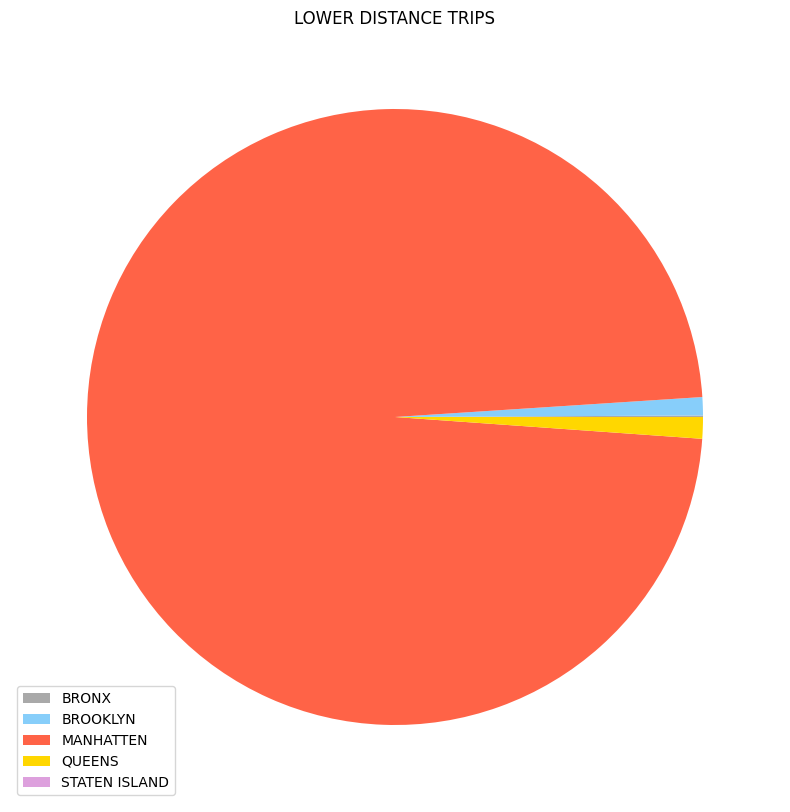

-------------------- YEAR AVERAGE - UPPER DISTANCE TRIPS --------------------
[0.2572600693567335, 2.266546456881502, 75.5976493321977, 21.87381040789984, 0.004733733664223249] 


-------------------- JANUARY --------------------
[0.12174192285606274, 1.9262154179597795, 76.92446864578653, 21.025445496312344, 0.0021285170852827387] 

-------------------- FEBRUARY --------------------
[0.115730604463148, 1.8705348688883214, 78.8223081286077, 19.19009668824312, 0.0013297097977144582] 

-------------------- MARCH --------------------
[0.19507921772522488, 2.176871545167135, 77.3598079915124, 20.26614946757974, 0.0020917780154967283] 

-------------------- APRIL --------------------
[0.22011013184852843, 2.220680882539252, 75.3772265355561, 22.179636314929823, 0.0023461351262924536] 

-------------------- MAY --------------------
[0.24321402705125933, 2.3264531122563064, 74.59945084039171, 22.828383098499312, 0.0024989218014124077] 

-------------------- JUNE --------------------
[0.242972

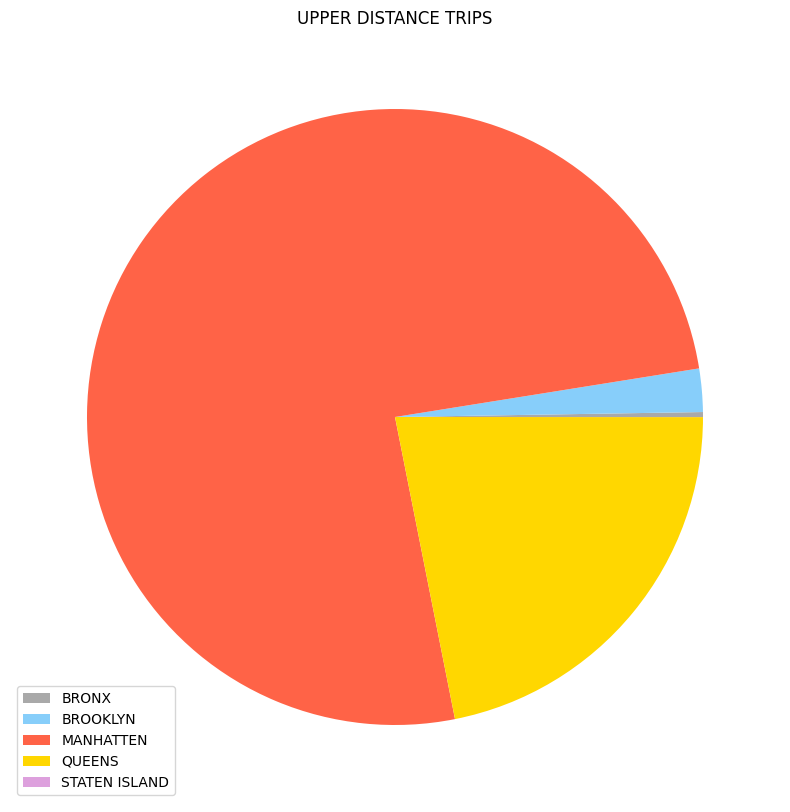

In [2]:
lower_trips = []
upper_trips = []
for month in setup.year:
    lower_trips.append(districts(month, 'PULocationID')[0])
    upper_trips.append(districts(month, 'PULocationID')[1])
year_average('YEAR AVERAGE - LOWER DISTANCE TRIPS', lower_trips)
monthly_result('LOWER DISTANCE TRIPS', lower_trips)
year_average('YEAR AVERAGE - UPPER DISTANCE TRIPS', upper_trips)
monthly_result('UPPER DISTANCE TRIPS', upper_trips)

#### Center of Manhatten based on the customer pickups devided by lower and upper distance trips

In [3]:
lower_trips = []
upper_trips = []
for month in setup.year:
    lower_trips.append(manhatten_pickups(month)[0] / manhatten_pickups(month)[0].sum()*100)
    upper_trips.append(manhatten_pickups(month)[1] / manhatten_pickups(month)[1].sum()*100)
lower_center = lower_trips[0]
upper_center = upper_trips[0]
for index in range(11):
    lower_center += lower_trips[index+1]
    upper_center += upper_trips[index+1]
center_result(center(lower_center/12))

---------- Category 0 ----------
[151, 50, 211, 75, 125, 13, 166, 41, 74, 87, 261, 24, 224, 4, 45, 42, 88, 232, 209, 116, 152, 244, 12, 243, 127, 202, 194, 153, 128, 120, 105] 

---------- Category 1 ----------
[140, 113, 43, 231, 246, 137, 114, 233, 143, 262, 148, 158, 144] 

---------- Category 2 ----------
[141, 79, 107, 164, 68, 100, 238, 229, 249, 263, 90] 

---------- Category 3 ----------
[230, 186, 234, 170, 142, 48, 163, 239] 

---------- Category 4 ----------
[236, 161, 162] 

---------- Category 5 ----------
[237] 



![](../assets/lower_pu_manhatten.jpg?raw=true)

In [4]:
center_result(center(upper_center/12))

---------- Category 0 ----------
[143, 125, 75, 166, 74, 209, 45, 41, 24, 232, 4, 224, 244, 116, 42, 152, 12, 243, 127, 194, 202, 153, 128, 120] 

---------- Category 1 ----------
[263, 141, 238, 114, 229, 261, 246, 144, 90, 113, 262, 137, 233, 88, 43, 158, 211, 151, 50] 

---------- Category 2 ----------
[234, 170, 236, 163, 237, 148, 164, 68, 13, 142, 107, 87, 140, 100, 249, 239] 

---------- Category 3 ----------
[161, 79, 48, 186, 162, 231] 

---------- Category 4 ----------
[230] 

---------- Category 5 ----------
[] 



![](../assets/upper_pu_manhatten.jpg?raw=true)

# DOLocationID
#### Distribution of lower and upper distance trips based on the customer dropoffs


-------------------- YEAR AVERAGE - LOWER DISTANCE TRIPS --------------------
[0.11937140225582471, 1.1770508358347354, 97.50322960829604, 1.1989077605291862, 0.0014403930842123603] 


-------------------- JANUARY --------------------
[0.11096776211364187, 1.0952280421915195, 97.66320283361873, 1.1289593644687357, 0.001641997607374915] 

-------------------- FEBRUARY --------------------
[0.09946390310254945, 1.0568100880574474, 97.77714408578856, 1.0653584044795787, 0.0012235185718699705] 

-------------------- MARCH --------------------
[0.12455034073268079, 1.2180812271066566, 97.47827330841349, 1.1778346707814105, 0.00126045296575789] 

-------------------- APRIL --------------------
[0.11712582408234286, 1.1975856384490173, 97.55415810742437, 1.1301383402574785, 0.0009920897867910204] 

-------------------- MAY --------------------
[0.12142536762669251, 1.2661208034981943, 97.40292076108717, 1.208341747036143, 0.0011913207517948736] 

-------------------- JUNE --------------------

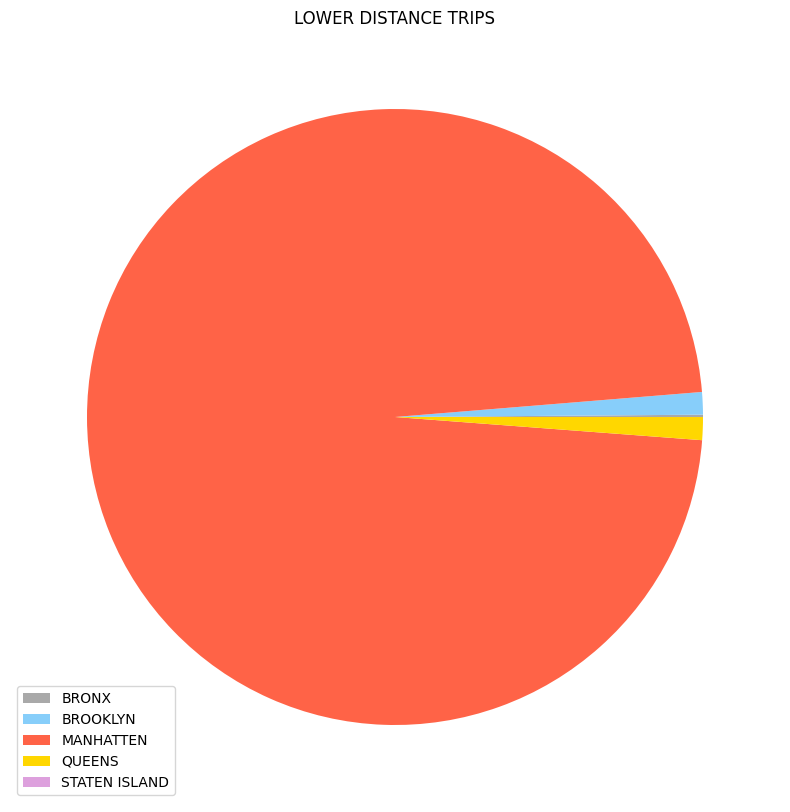

-------------------- YEAR AVERAGE - UPPER DISTANCE TRIPS --------------------
[2.248278945940494, 13.57648457810489, 68.25079812740792, 15.841044241704122, 0.08339410684257209] 


-------------------- JANUARY --------------------
[2.0405456887579736, 13.378587156642553, 69.79124541889387, 14.719988453808439, 0.06963328189717423] 

-------------------- FEBRUARY --------------------
[1.924283680877796, 12.7111714662448, 70.96734097759547, 14.333246603748295, 0.06395727153363415] 

-------------------- MARCH --------------------
[2.163461844219045, 13.189795050498585, 68.98190055800501, 15.591026977661567, 0.07381556961579865] 

-------------------- APRIL --------------------
[2.235748186427668, 13.554039590473204, 68.4589121809356, 15.678778771203392, 0.07252127096013924] 

-------------------- MAY --------------------
[2.3341305753918533, 13.794517965935066, 67.26007190484874, 16.5339168987765, 0.07736265504783671] 

-------------------- JUNE --------------------
[2.3016787129116083, 13

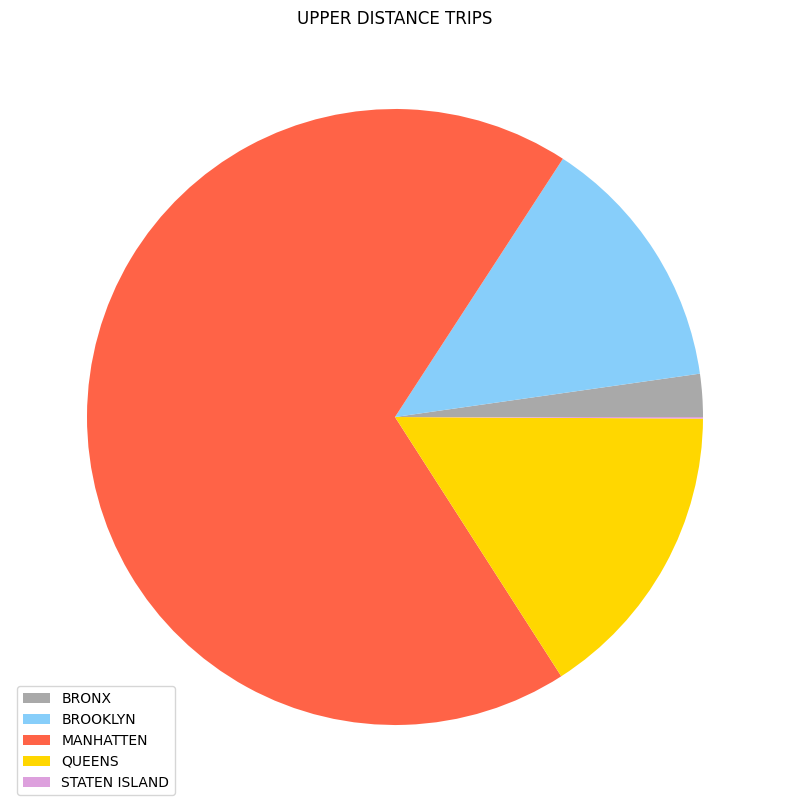

In [5]:
lower_trips = []
upper_trips = []
for month in setup.year:
    lower_trips.append(districts(month, 'DOLocationID')[0])
    upper_trips.append(districts(month, 'DOLocationID')[1])
year_average('YEAR AVERAGE - LOWER DISTANCE TRIPS', lower_trips)
monthly_result('LOWER DISTANCE TRIPS', lower_trips)
year_average('YEAR AVERAGE - UPPER DISTANCE TRIPS', upper_trips)
monthly_result('UPPER DISTANCE TRIPS', upper_trips)

#### Center of Manhatten based on the customer dropoffs devided by lower and upper distance trips

In [6]:
lower_trips = []
upper_trips = []
for month in setup.year:
    lower_trips.append(manhatten_dropoffs(month)[0] / manhatten_dropoffs(month)[0].sum()*100)
    upper_trips.append(manhatten_dropoffs(month)[1] / manhatten_dropoffs(month)[1].sum()*100)
lower_center = lower_trips[0]
upper_center = upper_trips[0]
for index in range(11):
    lower_center += lower_trips[index+1]
    upper_center += upper_trips[index+1]
center_result(center(lower_center/12))

---------- Category 0 ----------
[144, 211, 151, 74, 166, 125, 13, 41, 4, 224, 87, 232, 24, 261, 42, 45, 209, 88, 152, 116, 244, 12, 243, 127, 202, 194, 120, 128, 153, 105] 

---------- Category 1 ----------
[249, 90, 100, 137, 113, 233, 143, 231, 262, 43, 50, 75, 114, 158, 148] 

---------- Category 2 ----------
[239, 141, 163, 68, 79, 107, 164, 238, 229, 246, 263, 140] 

---------- Category 3 ----------
[170, 162, 230, 234, 142, 48, 186] 

---------- Category 4 ----------
[236, 161, 237] 

---------- Category 5 ----------
[] 



![](../assets/lower_do_manhatten.jpg?raw=true)

In [7]:
center_result(center(upper_center/12))

---------- Category 0 ----------
[114, 90, 232, 243, 158, 209, 125, 4, 24, 224, 45, 152, 127, 202, 12, 128, 194, 153, 120, 105] 

---------- Category 1 ----------
[234, 237, 186, 262, 142, 68, 164, 75, 107, 244, 246, 148, 166, 41, 74, 88, 229, 261, 42, 151, 100, 233, 144, 249, 143, 113, 137, 43, 211, 116, 50] 

---------- Category 2 ----------
[161, 48, 238, 87, 263, 162, 79, 239, 170, 141, 140, 163] 

---------- Category 3 ----------
[230, 236, 231, 13] 

---------- Category 4 ----------
[] 

---------- Category 5 ----------
[] 



![](../assets/upper_do_manhatten.jpg?raw=true)